   Age  Silver  Bronze           Athlete       Date  Gold       Sport Country
0   23       0       0    Michael Phelps 2008-08-24     8    Swimming     USA
1   19       0       2    Michael Phelps 2004-08-29     6    Swimming     USA
2   27       2       0    Michael Phelps 2012-08-12     4    Swimming     USA
3   25       2       3  Natalie Coughlin 2008-08-24     1    Swimming     USA
4   24       1       3     Aleksey Nemov 2000-10-01     2  Gymnastics  Russia
Age                 int64
Silver              int64
Bronze              int64
Athlete            object
Date       datetime64[ns]
Gold                int64
Sport              object
Country            object
dtype: object
[8 6 4 1 2 3]


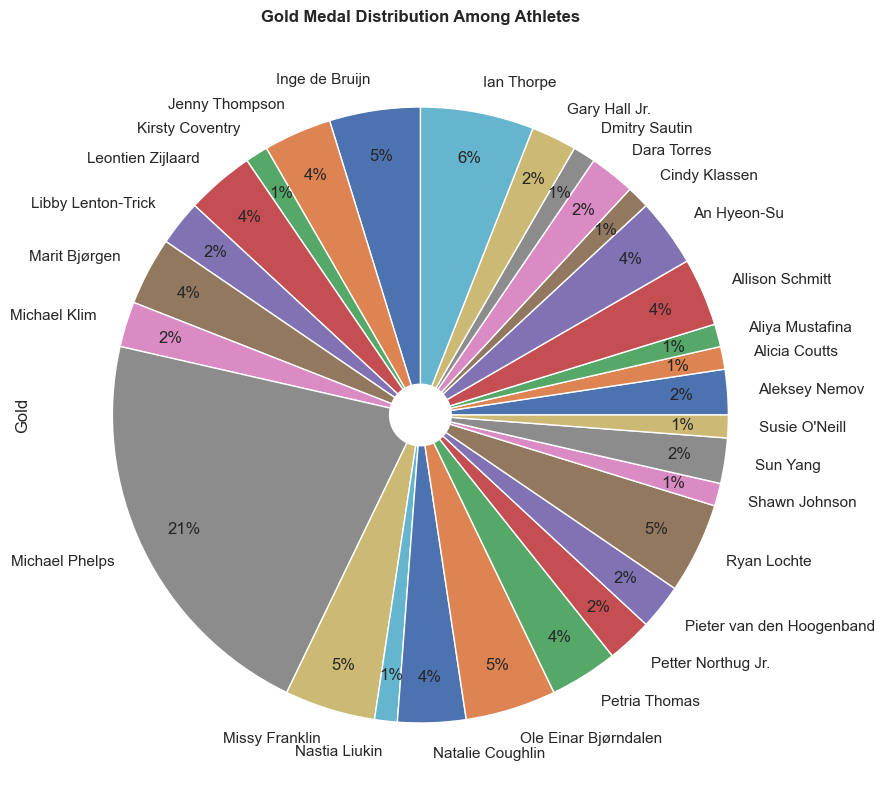

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

sns.set(style="darkgrid")

df = pd.read_excel(r"G:\data science\harvard project\New Microsoft Excel Worksheet.xlsx",skiprows=1)

def read():
    global df  
    df.columns = ["Age", "Silver", "Bronze", "Athlete", "Date", "Gold", "Sport","Country"]
    
    print(df.head())
    print(df.dtypes)
    print(df['Gold'].unique())
def pie():

    df['Gold'] = pd.to_numeric(df['Gold'], errors='coerce').fillna(0).astype(int)

 
    gold_counts = df.groupby("Athlete")['Gold'].sum()

  
    gold_counts = gold_counts[gold_counts > 0]


    gold_counts.plot(kind="pie",
                     autopct="%.0f%%",  
                     figsize=(10, 10),  
                     wedgeprops=dict(width=0.9),  
                     pctdistance=0.85)


    plt.title("Gold Medal Distribution Among Athletes", fontweight="bold")  
    plt.show()


read()
pie()


In [7]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)

cumulative_df = df.groupby([df.index, 'Athlete'])['Gold'].sum().groupby(level=1).cumsum().unstack().fillna(0)

selected = cumulative_df.iloc[-1].sort_values(ascending=False)[:20].index
data = cumulative_df[selected].round()


fig, ax = plt.subplots(figsize=(9.3, 5))
fig.subplots_adjust(left=0.25)
no_of_frames = data.shape[0]

bars = sns.barplot(y=data.columns, x=data.iloc[0], orient="h", ax=ax)
ax.set_xlim(0, data.max().max() * 1.1)
txts = [ax.text(0, i, 0, va="center") for i in range(data.shape[1])]
title_txt = ax.text(data.max().max() * 0.5, -1, "Date: ", fontsize=12)

   
def animate(i):
    y = data.iloc[i, :]
    title_txt.set_text(f"Date: {data.index[i].date()}")
    for j, b in enumerate(bars.patches):
        b.set_width(y.iloc[j])
        txts[j].set_text(f"{y.iloc[j].astype(int)}")
        txts[j].set_x(y.iloc[j] + data.max().max() * 0.01)



anim = FuncAnimation(fig, animate, repeat=False, frames=no_of_frames, interval=100, blit=False)

anim.save('athletes.gif', writer=PillowWriter(fps=30))


plt.close(fig)


In [9]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd


df['Gold'] = pd.to_numeric(df['Gold'], errors='coerce').fillna(0).astype(int)
df['Silver'] = pd.to_numeric(df['Silver'], errors='coerce').fillna(0).astype(int)
df['Bronze'] = pd.to_numeric(df['Bronze'], errors='coerce').fillna(0).astype(int)

df_grouped=df.groupby(['Country','Date'])[['Gold','Silver','Bronze']].sum().reset_index()


app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Olympic Medals Dashboard"),
    dcc.Dropdown(id='country-dropdown',
                 options=[{'label': country, 'value': country} for country in df['Country'].unique()],
                 value='USA'),
    dcc.Graph(id='medals-graph')
])

@app.callback(
    Output('medals-graph', 'figure'),
    [Input('country-dropdown', 'value')]
)
def update_graph(selected_country):
    filtered_df = df_grouped[df_grouped['Country'] == selected_country]
   
    if filtered_df.empty:
        fig = px.bar(title=f"No data available for {selected_country}")
    else:
    
        fig = px.bar(filtered_df, x='Date', y=['Gold', 'Silver', 'Bronze'],
                     title=f"Medal Count for {selected_country}",
                     labels={'value': 'Medals', 'Date': 'Year'},
                     barmode='stack')
    
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)
    

C:\Users\r tech\AppData\Local\Temp\ipykernel_10940\115738267.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\r tech\AppData\Local\Temp\ipykernel_10940\115738267.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
